In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as patches

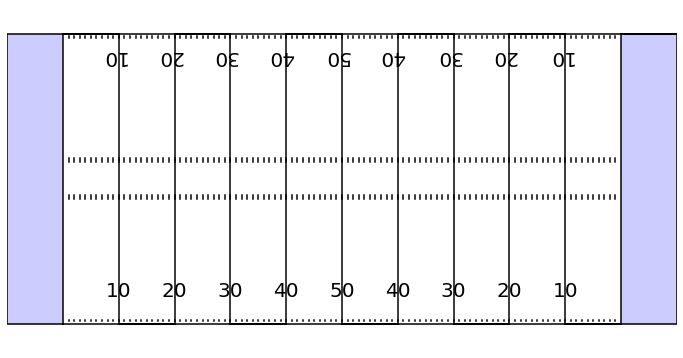

In [7]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='white', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='black')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='black')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='black', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='black')
        ax.plot([x, x], [53.0, 52.5], color='black')
        ax.plot([x, x], [22.91, 23.57], color='black')
        ax.plot([x, x], [29.73, 30.39], color='black')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

create_football_field()
plt.show()

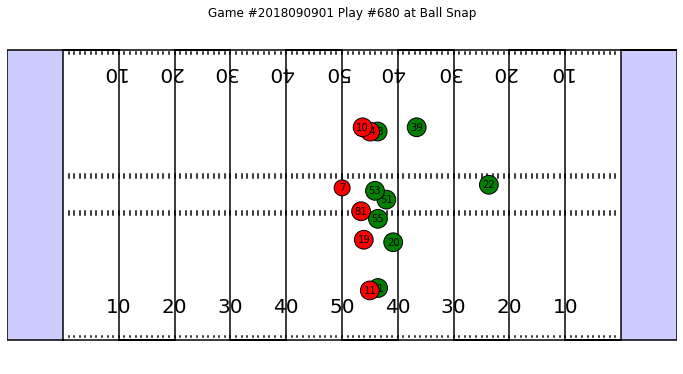

In [89]:
train2021 = pd.read_csv('./week1.csv')

example_play_home = train2021.query('gameId == 2018090901 and playId == 680 and team == "home"')
example_play_away = train2021.query('gameId == 2018090901 and playId == 680 and team == "away"')
example_play_ball = train2021.query('gameId == 2018090901 and playId == 680 and team == "football"')

fig, ax = create_football_field()


for index, row in example_play_home.query('event == "ball_snap"').iterrows():
    plt.text(row['x'], row['y'], int(row['jerseyNumber']), size=10,
         bbox=dict(boxstyle="circle",
                   fc="green",
                   )
         )
    
for index, row in example_play_away.query('event == "ball_snap"').iterrows():
    plt.text(row['x'], row['y'], int(row['jerseyNumber']), size=10,
         bbox=dict(boxstyle="circle",
                   fc="red",
                   )
         )

plt.title('Game #2018090901 Play #680 at Ball Snap')
plt.show()

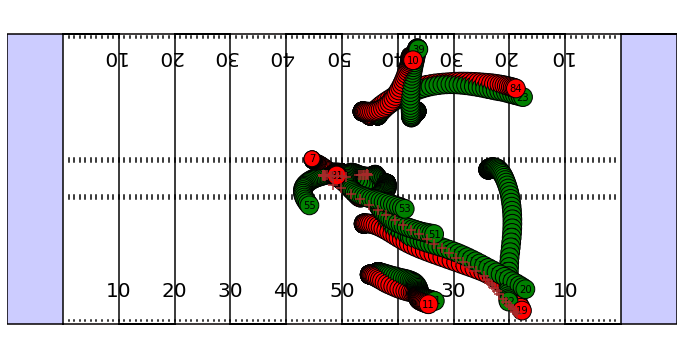

In [90]:
from celluloid import Camera
import matplotlib.animation as animation

fig, ax = create_football_field()
camera = Camera(fig)
ims=[]


for i in range(1, max(example_play_home["frameId"]) + 1):
    im = []

    for index, row in example_play_home.query(f'frameId == {i}').iterrows():
        im.append(plt.text(row['x'], row['y'], int(row['jerseyNumber']), size=10,
         bbox=dict(boxstyle="circle",
                   fc="green",
                   )
         ))
    
    for index, row in example_play_away.query(f'frameId == {i}').iterrows():
        im.append(plt.text(row['x'], row['y'], int(row['jerseyNumber']), size=10,
             bbox=dict(boxstyle="circle",
                       fc="red",
                       )
             ))
    im.append(plt.scatter(
        example_play_ball.query(f'frameId == {i}')['x'],
        example_play_ball.query(f'frameId == {i}')['y'],
        marker='+',
        color='brown',
        s=100,
        zorder=100000
    ))
    ims.append(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=False,
                              repeat_delay=2000)
plt.show()
ani.save('test.gif',writer='imagemagick') 